# Redoing figures of the poster

In [1]:
import naminggamesal as ngal # importing the library
import matplotlib.pyplot as plt

In [2]:
def xp_cfg(N,M,W,choice='random'): #generating the config of the experiment, for active and random topic choice
    base_cfg = {
          "step": "log_improved", 
          "pop_cfg": {
            "voc_cfg": {
          "voc_type": 'matrix_new'
            }, 
        "strat_cfg": {
          "vu_cfg": {
            "vu_type": "minimal"
          }, 
          "success_cfg": {
            "success_type": "global_norandom"
              }, 
              "strat_type": "naive"
            }, 
            "nbagent": N,  #population size
            "env_cfg": {
              "env_type": "simple", 
              "M": M,  #number of meanings
              "W": W   #number of words
            }, 
            "interact_cfg": {
              "interact_type": "speakerschoice"
            }
          }
        }
    if choice == 'active':
        base_cfg['pop_cfg']['strat_cfg']['strat_type'] = 'lapsmax_mab_explothreshold'
    return base_cfg

In [3]:
N = 40 # population size
M = 40 # number of meanings
W = 40 # number of words

analysis_f = [  #analysis functions
    'srtheo',     # probability of success
    'Nlink',      # vocabulary size (agent level)
    'N_d',        # vocabulary size (population level)  
    'homonymy',   # average degree of homonymy 
    'synonymy',   # average degree of synonymy
    'N_meanings', # average number of meanings known by each agent
    'N_words'     # average number of words known by each agent
]


nbiter = 3  # number of trials per condition
Tmax = 80000 # number of interactions for simulation

In [4]:
db = ngal.ngdb.NamingGamesDB() # connect to the database

In [5]:
# RUNNING the experiments: this might be long
for exp_type in ['random','active']:
    blacklist = []
    for i in range(nbiter):
        cfg = xp_cfg(N=N,M=M,W=W,choice=exp_type)
        print('Starting running '+exp_type+' experiment, iteration '+str(i+1)+'/'+str(nbiter))
        xp = db.get_experiment(blacklist=blacklist,**cfg)
        xp.continue_exp_until(Tmax)
        for an_f in analysis_f:
            xp.graph(an_f)
        blacklist.append(xp.uuid)

Starting running random experiment, iteration 1/3
Starting running random experiment, iteration 2/3
Starting running random experiment, iteration 3/3
Starting running active experiment, iteration 1/3
Starting running active experiment, iteration 2/3
Starting running active experiment, iteration 3/3


In [6]:
# setting matplotlib parameters

import matplotlib

fontsize = 15
matplotlib.rcParams['font.size'] = fontsize
matplotlib.rcParams['xtick.labelsize'] = fontsize
matplotlib.rcParams['ytick.labelsize'] = fontsize
matplotlib.rcParams['axes.titlesize'] = fontsize+5
matplotlib.rcParams['axes.labelsize'] = fontsize
matplotlib.rcParams['legend.fontsize'] = fontsize
matplotlib.rcParams['figure.figsize'] = 8,5.5
matplotlib.rcParams['lines.linewidth'] = 3

In [7]:
def get_plot(an_f):
    blacklist = []
    xp_l = []
    for i in range(nbiter):
        xp = db.get_experiment(blacklist=blacklist,**xp_cfg(N=N,M=M,W=W,choice='random'))
        blacklist.append(xp.uuid)
        xp_l.append(xp)
        gr = xp_l[0].graph(an_f)
        for exp in xp_l[1:]:
            gr.add_graph(exp.graph(an_f))
        gr.merge()
    
    blacklist = []
    xp_l = []
    for i in range(nbiter):
        xp = db.get_experiment(blacklist=blacklist,**xp_cfg(N=N,M=M,W=W,choice='active'))
        blacklist.append(xp.uuid)
        xp_l.append(xp)
        gr_active = xp_l[0].graph(an_f)
        for exp in xp_l[1:]:
            gr_active.add_graph(exp.graph(an_f))
        gr_active.merge()
    gr.add_graph(gr_active)
    gr.legendoptions['labels'] = ['Random Topic Choice']+['Active Topic Choice']
    return gr

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:518: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


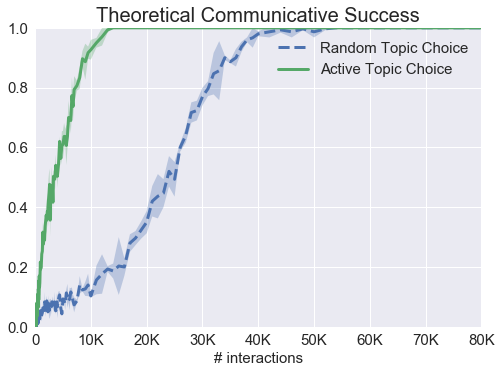

In [8]:
gr = get_plot('srtheo')
    
gr.Yoptions[0]['linestyle'] = '--'
gr.title = 'Theoretical Communicative Success'
gr.xmin = 0
gr.xmax = 80000
gr.xlabel = '# interactions'
gr.xticker = True
gr.show()
None

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:518: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


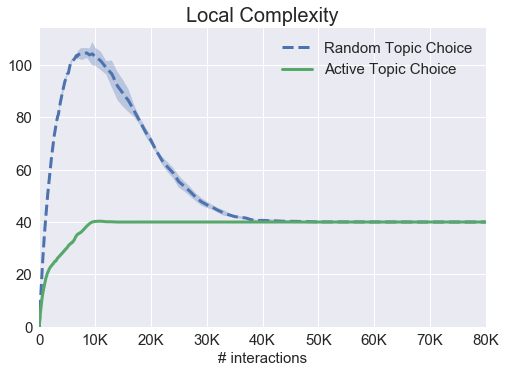

In [9]:
gr = get_plot('Nlink')

gr.Yoptions[0]['linestyle'] = '--'
gr.title = 'Local Complexity'
gr.xmin = 0
gr.xmax = 80000
gr.xlabel = '# interactions'
gr.xticker = True
gr.show()
None

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:518: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


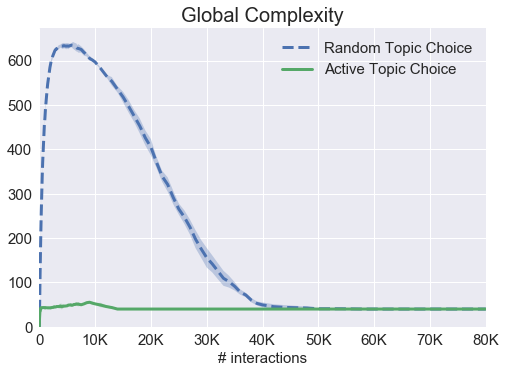

In [10]:
gr = get_plot('N_d')

gr.Yoptions[0]['linestyle'] = '--'
gr.title = 'Global Complexity'
gr.xmin = 0
gr.xmax = 80000
gr.xlabel = '# interactions'
gr.xticker = True
gr.show()
None